In [1]:
import pandas as pd

df = pd.read_csv("vod_csv.csv", index_col=False)

print(df)


C:\Users\pawel\AppData\Local\Temp\ipykernel_20248\2692016784.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


        Unnamed: 0             datetime  duration  \
0            58773  2017-01-01 01:15:09       0.0   
1            58774  2017-01-01 13:56:02       0.0   
2            58775  2017-01-01 15:17:47   10530.0   
3            58776  2017-01-01 16:04:13      49.0   
4            58777  2017-01-01 19:16:37       0.0   
...            ...                  ...       ...   
671731      730504  2019-06-30 21:37:08     851.0   
671732      730505  2019-06-30 21:49:34   91157.0   
671733      730506  2019-06-30 22:00:44       0.0   
671734      730507  2019-06-30 22:04:23       0.0   
671735      730508  2019-06-30 22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                          

In [2]:
df=df.drop(columns=['Unnamed: 0'])

df=df.reset_index(drop=True)

print(df)

                   datetime  duration  \
0       2017-01-01 01:15:09       0.0   
1       2017-01-01 13:56:02       0.0   
2       2017-01-01 15:17:47   10530.0   
3       2017-01-01 16:04:13      49.0   
4       2017-01-01 19:16:37       0.0   
...                     ...       ...   
671731  2019-06-30 21:37:08     851.0   
671732  2019-06-30 21:49:34   91157.0   
671733  2019-06-30 22:00:44       0.0   
671734  2019-06-30 22:04:23       0.0   
671735  2019-06-30 22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
671731        Oprah Presents When They See Us Now   
671732                               HALO Legends   
671733                        

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

df.loc[df['release_date'] == 'NOT AVAILABLE', 'release_date'] = pd.NaT

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

years_of_interest = [2017, 2018, 2019]

df_filtered = df[df['datetime'].dt.year.isin(years_of_interest)]

genres_df = df_filtered['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_df.name = 'genre'

df_split = df_filtered.drop('genres', axis=1).join(genres_df)

genres_popularity_df = df_split.pivot_table(index='genre', columns=df_split['datetime'].dt.year, aggfunc='size', fill_value=0)

print(genres_popularity_df)


datetime        2017    2018   2019
genre                              
Action         73978   87717  45014
Adventure      56416   69275  34929
Animation      16205   15818   7360
Biography      14692   17631   9972
Comedy         95080  107426  53695
Crime          42401   43646  27611
Documentary    27470   19867  15367
Drama          95267  112657  61338
Family         24336   23161  11185
Fantasy        35059   38231  20557
Film-Noir         19      64     16
History        10925   13622   3919
Horror         19121   24264  14286
Music           6364    7117   7991
Musical         4298    4621   2469
Mystery        23318   30165  19096
NOT AVAILABLE  10391   10429   5741
News            1057     442    158
Reality-TV         0     819     89
Romance        44215   49098  28192
Sci-Fi         39320   52363  29628
Short           1928    1662   1385
Sport           6591    6531   3772
Talk-Show          0       0     77
Thriller       66125   75408  40728
War             8394   10675

In [4]:
genres_popularity_df.drop("NOT AVAILABLE", inplace=True)
print(genres_popularity_df)

datetime      2017    2018   2019
genre                            
Action       73978   87717  45014
Adventure    56416   69275  34929
Animation    16205   15818   7360
Biography    14692   17631   9972
Comedy       95080  107426  53695
Crime        42401   43646  27611
Documentary  27470   19867  15367
Drama        95267  112657  61338
Family       24336   23161  11185
Fantasy      35059   38231  20557
Film-Noir       19      64     16
History      10925   13622   3919
Horror       19121   24264  14286
Music         6364    7117   7991
Musical       4298    4621   2469
Mystery      23318   30165  19096
News          1057     442    158
Reality-TV       0     819     89
Romance      44215   49098  28192
Sci-Fi       39320   52363  29628
Short         1928    1662   1385
Sport         6591    6531   3772
Talk-Show        0       0     77
Thriller     66125   75408  40728
War           8394   10675   3232
Western       2959    4782   1372


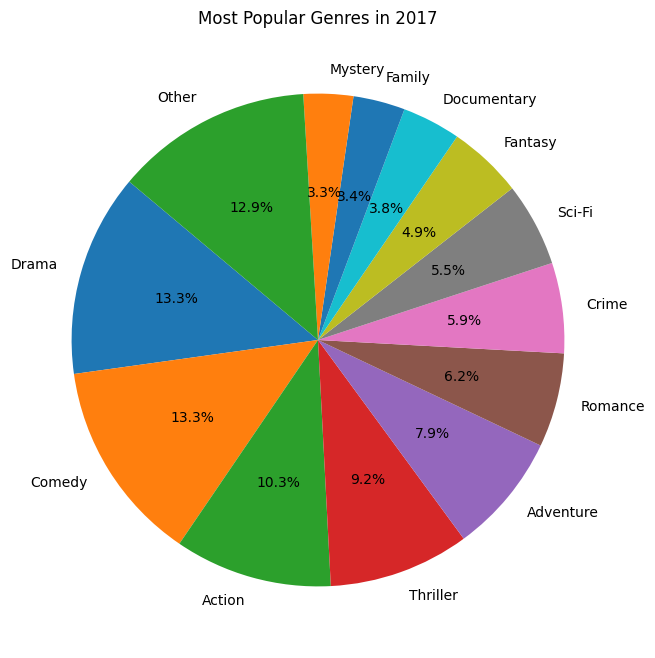

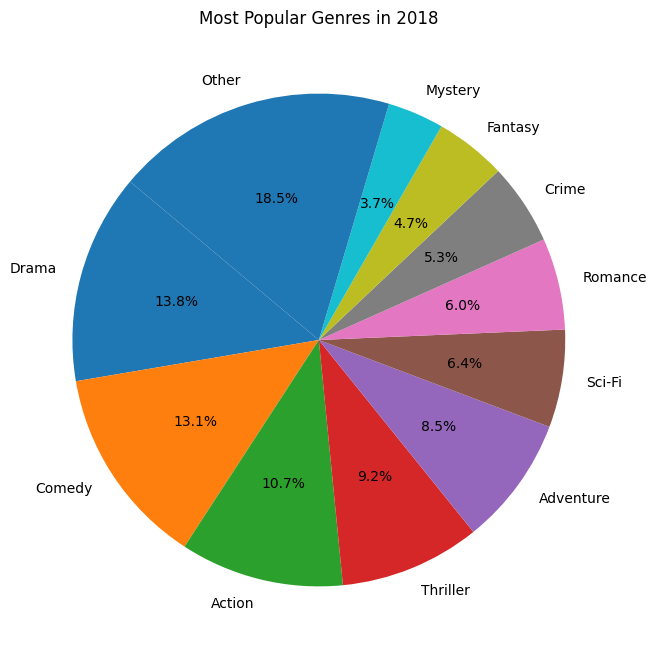

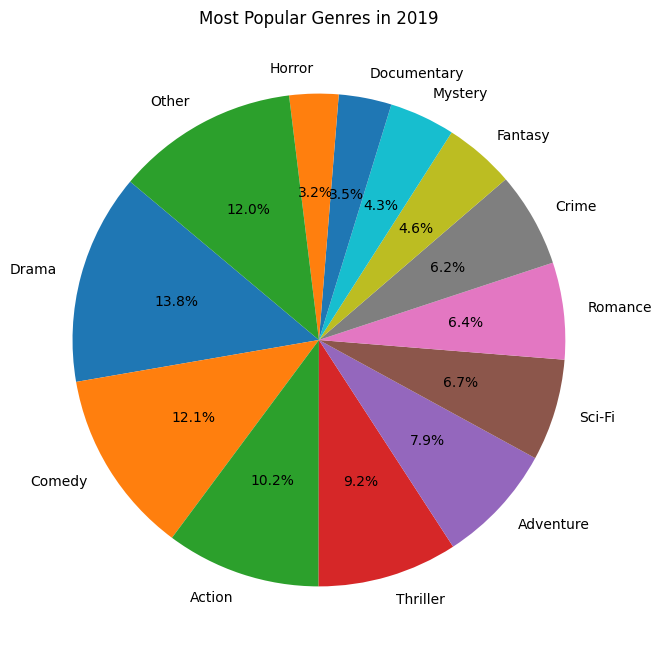

In [5]:
import matplotlib.pyplot as plt

def plot_pie_chart(year_data, year):
    sorted_data = year_data.sort_values(ascending=False)
    
    top_categories = sorted_data[sorted_data >= 0.03 * sorted_data.sum()]
    
    other = sorted_data[sorted_data < 0.03 * sorted_data.sum()].sum()
    if other > 0:
        top_categories['Other'] = other
    
    plt.figure(figsize=(8, 8))
    plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Most Popular Genres in {year}')
    plt.show()

genres_popularity_df.columns = genres_popularity_df.columns.astype(str)

for year in ['2017', '2018', '2019']:
    plot_pie_chart(genres_popularity_df[year], year)